Importar Librerías

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split

Importar Dataset

In [2]:
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
titanic = pd.read_csv(url)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


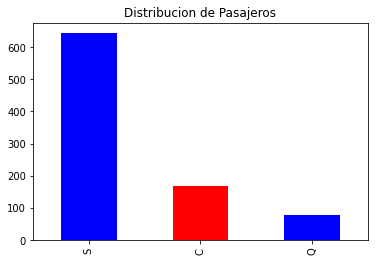

In [4]:
titanic.Embarked.value_counts().plot(kind = 'bar', color = ['b', 'r'])
plt.title('Distribucion de Pasajeros')
plt.show()

Rellenar datos faltantes

In [5]:
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].mean())
titanic['Embarked'] = titanic['Embarked'].fillna('S')

In [6]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

titanic['Sex'] = label_encoder.fit_transform(titanic['Sex'])
titanic.head()
titanic['Embarked'] = label_encoder.fit_transform(titanic['Embarked'])
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2


In [7]:
titanic_num = titanic.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis = 1)
titanic_num.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [30]:
titanic_num


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.000000,1,0,7.2500,2
1,1,0,38.000000,1,0,71.2833,0
2,3,0,26.000000,0,0,7.9250,2
3,1,0,35.000000,1,0,53.1000,2
4,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,2
887,1,0,19.000000,0,0,30.0000,2
888,3,0,29.699118,1,2,23.4500,2
889,1,1,26.000000,0,0,30.0000,0


In [8]:
y_survived = titanic['Survived'].values

Dividir Dataset

In [9]:
x_train, x_validation, y_train, y_validation = train_test_split(titanic_num, y_survived, test_size = .8, random_state = 8)

Crear Clasificador

In [10]:
tree_titanic = tree.DecisionTreeClassifier()
tree_titanic = tree_titanic.fit(x_train, y_train)

In [11]:
tree_titanic_accuracy = tree_titanic.score(x_validation, y_validation)
print('Accuracy: ', tree_titanic_accuracy)

Accuracy:  0.7363253856942497


In [13]:
samuel = np.array([[3,1,30,1,0,8.5,2]])
samuel

array([[ 3. ,  1. , 30. ,  1. ,  0. ,  8.5,  2. ]])

In [59]:
sebastian = np.array([[2, 1, 23, 0, 2, 15, 2]])

In [60]:
sobrevivir = tree_titanic.predict(sebastian)

In [61]:
if sobrevivir[0] == 1:
  print ("Tienes más probabilidades de Sobrevivir")
else:
  print ("Tienes más probabilidades de No Sobrevivir")

Tienes más probabilidades de No Sobrevivir


In [62]:
from io import StringIO 
from IPython.display import Image, display
import pydotplus

out = StringIO()
tree.export_graphviz(tree_titanic, out_file = out)

graph = pydotplus.graph_from_dot_data(out.getvalue())
graph.write_png('titanic.png')

True